### Import Required Models and Helper Classes

In [1]:
%matplotlib inline
import numpy as np
np.random.seed(42)

In [2]:
%reload_ext autoreload
%autoreload 2

PROJECT_DIR = "/Users/raghav/envPython3/experiments/one_class_neural_networks/"
import sys,os
import numpy as np
sys.path.append(PROJECT_DIR)
from src.data.make_dataset import CreateDataSet
from src.models.FF_NN import FF_NN
## Create data for training and testing
createData = CreateDataSet()

Using TensorFlow backend.


## Signatures of the methods


### ===============================================================
get_USPS_TestingData: 
        returns-> 220 : 1's and 11: 7's
 

get_USPS_TrainingData: 
        returns-> 220 : 1's and 50: 7's


### ===============================================================



get_USPS_TestingData_With_Random_UniformNoise: 
        returns-> 220 : 1's and 220: URN( Uniform Random Noise)

get_FAKE_Noise_TrainingData
        returns-> 220 : URN

### ===============================================================


#### ===============================================================
### Experiment Setup


- for all methods, the test set is exactly the same (i.e., ones and sevens)

- for OCNN_FakeNoise, the training set does include uniform noise; what we do is treat these as negatives, and add a new term to the objective, which measures the hinge loss when making predictions for these fake points. This is almost exactly the same as the Keras FakeNN method, but instead of using cross-entropy loss, we use hinge-loss; and we additionally learn a parameter r, which controls the fraction of points predicted to be anomalous



## Obtain Training and Test Datasets

In [3]:
## Obtaining the training and testing data
%reload_ext autoreload
%autoreload 2
NUM_NORMAL = 1260
TRAIN_NUM_ANOMALIES = 790
TEST_NUM_ANOMALIES = 50
# trainX,trainY = createData.get_MNIST_TrainingData(NUM_NORMAL)
trainX,trainY,train_Anomaly_X,train_Anomaly_Y = createData.get_USPS_TrainingData(NUM_NORMAL,TRAIN_NUM_ANOMALIES)
[test_ones,label_ones,test_sevens,label_sevens]= createData.get_USPS_TestingData(NUM_NORMAL,TEST_NUM_ANOMALIES)

1260 Positive train samples with shape (1260, 16, 16)
790 Negative train samples
1260 Positive test samples with shape (1260, 16, 16)
50 Negative test samples


## Train and Test  FF_NN Model Supervised Model

[INFO] 790 Anomalous Samples Appended to training set
[INFO] 2050 Training Samples Contains both 1's and 7s
[INFO] compiling model...
[INFO] training network...
[INFO] serializing network...
[INFO] loading network...
1310 Actual test samples
auccary_score: 0.9961832061068703
roc_auc_score: 0.9788095238095238
y_true [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_pred [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
AUC:  0.9788095238095238


/Users/raghav/envPython3/lib/python3.6/site-packages/keras/engine/sequential.py:252: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


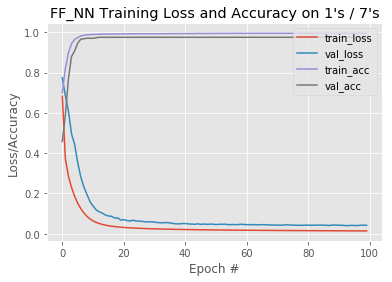

In [4]:
%reload_ext autoreload
%autoreload 2

IMG_DIM= 256
HIDDEN_LAYER_SIZE=128
IMG_HGT =16
IMG_WDT=16
IMG_DEPTH=1
MODEL_SAVE_PATH = PROJECT_DIR + "/models/USPS/FF_NN/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/USPS/FF_NN/"

print("[INFO]",train_Anomaly_X.shape[0],"Anomalous Samples Appended to training set")
data_train = np.concatenate((trainX,train_Anomaly_X),axis=0)
data_train_label = np.concatenate((trainY,train_Anomaly_Y),axis=0)
print("[INFO]",data_train.shape[0],"Training Samples Contains both 1's and 7s")
nClass =2
NUM_EPOCHS = 100

clf_FF_NN =  FF_NN(IMG_DIM,HIDDEN_LAYER_SIZE,IMG_HGT,IMG_WDT,MODEL_SAVE_PATH,REPORT_SAVE_PATH)
clf_FF_NN.fit(data_train,data_train_label,NUM_EPOCHS,IMG_HGT,IMG_WDT,IMG_DEPTH,nClass)

## Predict the scores 
auc_FF_NN = clf_FF_NN.score(test_ones,label_ones,test_sevens,label_sevens)
print("===========")
print("AUC: ",auc_FF_NN)
print("===========")

## FakeNoise FF_NN Model

[INFO] 1260 Noise Samples Appended for training set
[INFO] compiling model...
[INFO] training network...
[INFO] serializing network...
[INFO] loading network...
1310 Actual test samples
1310 Predicted test samples
auccary_score: 0.9618320610687023
roc_auc_score: 0.5
y_true [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_pred [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
AUC:  0.5


/Users/raghav/envPython3/lib/python3.6/site-packages/keras/engine/sequential.py:252: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


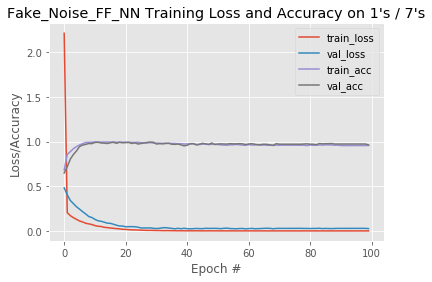

In [5]:
## Fake Noise data to be generated which will be added to the training set before training
%reload_ext autoreload
%autoreload 2

IMG_DIM= 256
HIDDEN_LAYER_SIZE=128
IMG_HGT =16
IMG_WDT=16
IMG_DEPTH=1

MODEL_SAVE_PATH = PROJECT_DIR + "/models/USPS/FAKE_NOISE_FF_NN/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/USPS/FAKE_NOISE_FF_NN/"


nClass =2
NUM_EPOCHS = 100

from src.models.Fake_Noise_FF_NN import Fake_Noise_FF_NN
## Remove the Anomalous data and instead add Noise
X_Noise,X_NoiseLabel = createData.get_FAKE_Noise_USPS_TrainingData(trainX)
print("[INFO]",X_Noise.shape[0],"Noise Samples Appended for training set")
data_train = np.concatenate((trainX,X_Noise),axis=0)
data_train_label = np.concatenate((trainY,X_NoiseLabel),axis=0)


clf_FakeNoise_FF_NN =  Fake_Noise_FF_NN(IMG_DIM,HIDDEN_LAYER_SIZE,IMG_HGT,IMG_WDT,MODEL_SAVE_PATH,REPORT_SAVE_PATH)
clf_FakeNoise_FF_NN.fit(data_train,data_train_label,NUM_EPOCHS,IMG_HGT,IMG_WDT,IMG_DEPTH,nClass)
# Predict the scores 

auc_FAKENOISE_FF_NN = clf_FakeNoise_FF_NN.score(test_ones,label_ones,test_sevens,label_sevens)
print("===========")
print("AUC: ",auc_FAKENOISE_FF_NN)
print("===========")

## SKLEARN OCSVM

Training the OCSVM classifier.....
AUC: 0.9986190476190476
Training the OCSVM classifier.....
AUC: 0.9914285714285715


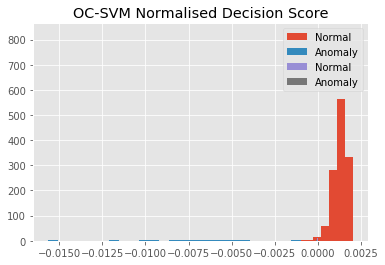

In [6]:
%reload_ext autoreload
%autoreload 2
##create the classifier
from src.models.ocsvmSklearn import OCSVM

IMG_HGT =16
IMG_WDT=16

ocsvm = OCSVM(IMG_HGT,IMG_WDT)
nu= 0.01
kernel = 'linear'
clf = ocsvm.fit(trainX,nu,kernel)
res = ocsvm.score(clf,test_ones,test_sevens)
auc_OCSVM_linear = res
print("="*35)
print("AUC:",res)
print("="*35)

kernel = 'rbf'
clf = ocsvm.fit(trainX,nu,kernel)
res = ocsvm.score(clf,test_ones,test_sevens)
auc_OCSVM_rbf = res
print("="*35)
print("AUC:",res)
print("="*35)

### OC-NN


[INFO] compiling model...
[INFO]  (128,) input  --> hidden layer weights shape ...
[INFO]  (2,) hidden --> output layer weights shape ...
[INFO] training network...
Epoch 1/100
1260/1260 [==============================] - 0s 120us/step - loss: -0.0358
evaluation for epoch: 0
output: Tensor("Print:0", shape=(?, 2), dtype=float32)
Epoch 2/100
1260/1260 [==============================] - 0s 18us/step - loss: -0.0424
evaluation for epoch: 1
output: Tensor("Print_1:0", shape=(?, 2), dtype=float32)
Epoch 3/100
1260/1260 [==============================] - 0s 17us/step - loss: -0.0489
evaluation for epoch: 2
output: Tensor("Print_2:0", shape=(?, 2), dtype=float32)
Epoch 4/100
1260/1260 [==============================] - 0s 22us/step - loss: -0.0551
evaluation for epoch: 3
output: Tensor("Print_3:0", shape=(?, 2), dtype=float32)
Epoch 5/100
1260/1260 [==============================] - 0s 21us/step - loss: -0.0612
evaluation for epoch: 4
output: Tensor("Print_4:0", shape=(?, 2), dtype=float32)
E

1260/1260 [==============================] - 0s 16us/step - loss: -0.2346
evaluation for epoch: 47
output: Tensor("Print_47:0", shape=(?, 2), dtype=float32)
Epoch 49/100
1260/1260 [==============================] - 0s 16us/step - loss: -0.2372
evaluation for epoch: 48
output: Tensor("Print_48:0", shape=(?, 2), dtype=float32)
Epoch 50/100
1260/1260 [==============================] - 0s 18us/step - loss: -0.2398
evaluation for epoch: 49
output: Tensor("Print_49:0", shape=(?, 2), dtype=float32)
Epoch 51/100
1260/1260 [==============================] - 0s 17us/step - loss: -0.2423
evaluation for epoch: 50
output: Tensor("Print_50:0", shape=(?, 2), dtype=float32)
Epoch 52/100
1260/1260 [==============================] - 0s 17us/step - loss: -0.2448
evaluation for epoch: 51
output: Tensor("Print_51:0", shape=(?, 2), dtype=float32)
Epoch 53/100
1260/1260 [==============================] - 0s 18us/step - loss: -0.2474
evaluation for epoch: 52
output: Tensor("Print_52:0", shape=(?, 2), dtype=fl

1260/1260 [==============================] - 0s 16us/step - loss: -0.3258
evaluation for epoch: 95
output: Tensor("Print_95:0", shape=(?, 2), dtype=float32)
Epoch 97/100
1260/1260 [==============================] - 0s 16us/step - loss: -0.3274
evaluation for epoch: 96
output: Tensor("Print_96:0", shape=(?, 2), dtype=float32)
Epoch 98/100
1260/1260 [==============================] - 0s 16us/step - loss: -0.3289
evaluation for epoch: 97
output: Tensor("Print_97:0", shape=(?, 2), dtype=float32)
Epoch 99/100
1260/1260 [==============================] - 0s 17us/step - loss: -0.3305
evaluation for epoch: 98
output: Tensor("Print_98:0", shape=(?, 2), dtype=float32)
Epoch 100/100
1260/1260 [==============================] - 0s 18us/step - loss: -0.3321
evaluation for epoch: 99
output: Tensor("Print_99:0", shape=(?, 2), dtype=float32)
[INFO] serializing network and saving trained weights...
[INFO] Saving model layer weights...
[INFO] loading network...
1310 Actual test samples
auccary_score: 0.

/Users/raghav/envPython3/lib/python3.6/site-packages/keras/engine/sequential.py:252: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


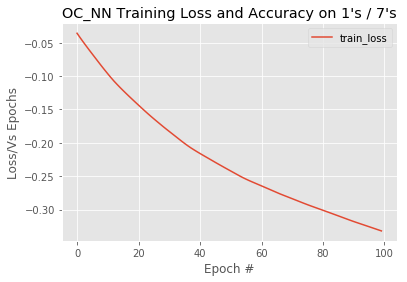

In [7]:
##create the classifier
## Instantiate the object and call the function

%reload_ext autoreload
%autoreload 2

DATASET = "USPS"
IMG_DIM= 256
HIDDEN_LAYER_SIZE=128
IMG_HGT =16
IMG_WDT=16
IMG_DEPTH=1

MODEL_SAVE_PATH = PROJECT_DIR + "/models/USPS/OC_NN/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/USPS/OC_NN/"
PRE_TRAINED_WT_PATH = PROJECT_DIR +"/models/USPS/FF_NN/"

nClass =2
NUM_EPOCHS = 100

from src.models.OC_NN import OC_NN
import keras

ocnn = OC_NN(DATASET,IMG_DIM,HIDDEN_LAYER_SIZE,IMG_HGT,IMG_WDT,MODEL_SAVE_PATH,REPORT_SAVE_PATH,PRE_TRAINED_WT_PATH)

nu= 0.01

ocnn.fit(trainX,nu,NUM_EPOCHS,IMG_HGT,IMG_WDT,IMG_DEPTH,nClass)
res = ocnn.score(test_ones,test_sevens) 
auc_OCNN = res

print("="*35)
print("AUC:",res)
print("="*35)


## Comparing  AUC scores of various methods

Text(0.5,1,'AUC Comparision for -- USPS Data')

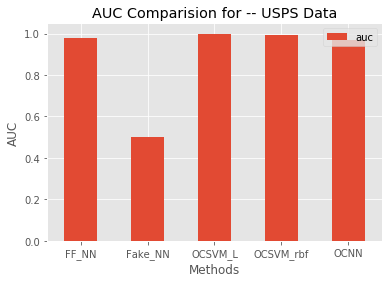

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

auc = np.zeros((1,5))
auc[0][0] = auc_FF_NN
auc[0][1] = auc_FAKENOISE_FF_NN
auc[0][2] = auc_OCSVM_linear
auc[0][3] = auc_OCSVM_rbf
auc[0][4] = auc_OCNN


aucList = [auc_FF_NN,auc_FAKENOISE_FF_NN, auc_OCSVM_linear,auc_OCSVM_rbf, auc_OCNN]

index = ['FF_NN', 'Fake_NN', 'OCSVM_L','OCSVM_rbf','OCNN']
df = pd.DataFrame({'auc': aucList}, index=index)
ax = df.plot.bar(rot=0)

plt.ylabel('AUC')
plt.xlabel('Methods')
plt.title('AUC Comparision for -- USPS Data')